In [2]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from zipfile import ZipFile
from kaggle.api.kaggle_api_extended import KaggleApi

# authentication requires creation of an API key with your kaggle account
# as well as storage of a local JSON in a specific directory
api = KaggleApi()
api.authenticate()

In [3]:
## read in data

# download dataset with Kaggle API
api.dataset_download_file('rupakroy/online-payments-fraud-detection-dataset/','PS_20174392719_1491204439457_log.csv')

# designate downloaded file as zip, and unzip
zf = ZipFile('PS_20174392719_1491204439457_log.csv.zip')
zf.extractall()
zf.close()

# read in extracted csv as pandas df
fraud = pd.read_csv('PS_20174392719_1491204439457_log.csv')

# delete downloaded zip and extracted csv - keep your directory clean!
os.remove('PS_20174392719_1491204439457_log.csv.zip')
os.remove('PS_20174392719_1491204439457_log.csv')

In [4]:
fraud.shape

(6362620, 11)

In [5]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Column Descriptions

The below column reference:

1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction

In [6]:
for col in fraud.columns:
    print(f'{col} - Dtype: {fraud[col].dtype} - Unique: {fraud[col].nunique()}')

step - Dtype: int64 - Unique: 743
type - Dtype: object - Unique: 5
amount - Dtype: float64 - Unique: 5316900
nameOrig - Dtype: object - Unique: 6353307
oldbalanceOrg - Dtype: float64 - Unique: 1845844
newbalanceOrig - Dtype: float64 - Unique: 2682586
nameDest - Dtype: object - Unique: 2722362
oldbalanceDest - Dtype: float64 - Unique: 3614697
newbalanceDest - Dtype: float64 - Unique: 3555499
isFraud - Dtype: int64 - Unique: 2
isFlaggedFraud - Dtype: int64 - Unique: 2


In [7]:
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_features = ['type', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud']

In [8]:
fraud.columns[:3]

Index(['step', 'type', 'amount'], dtype='object')

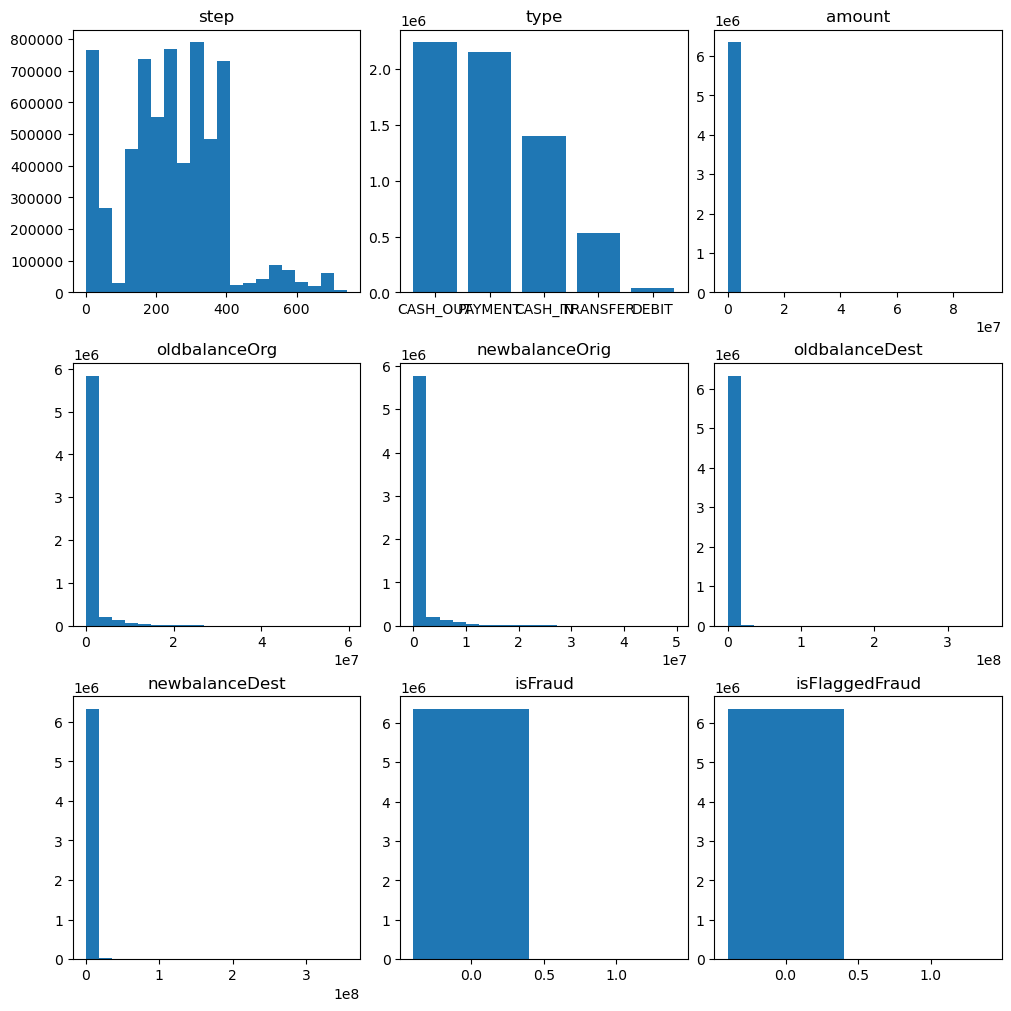

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10), layout='constrained')
cols_to_plot = [x for x in fraud.columns if x != 'nameOrig' and x != 'nameDest']

for col, ax in zip(cols_to_plot, axes.ravel()):
    if col in numerical_features:
        ax.hist(fraud[col], bins=20)
        ax.set_title(col)
    else:
        ax.bar(fraud[col].value_counts().index, fraud[col].value_counts().values)
        ax.set_title(col)

plt.show()

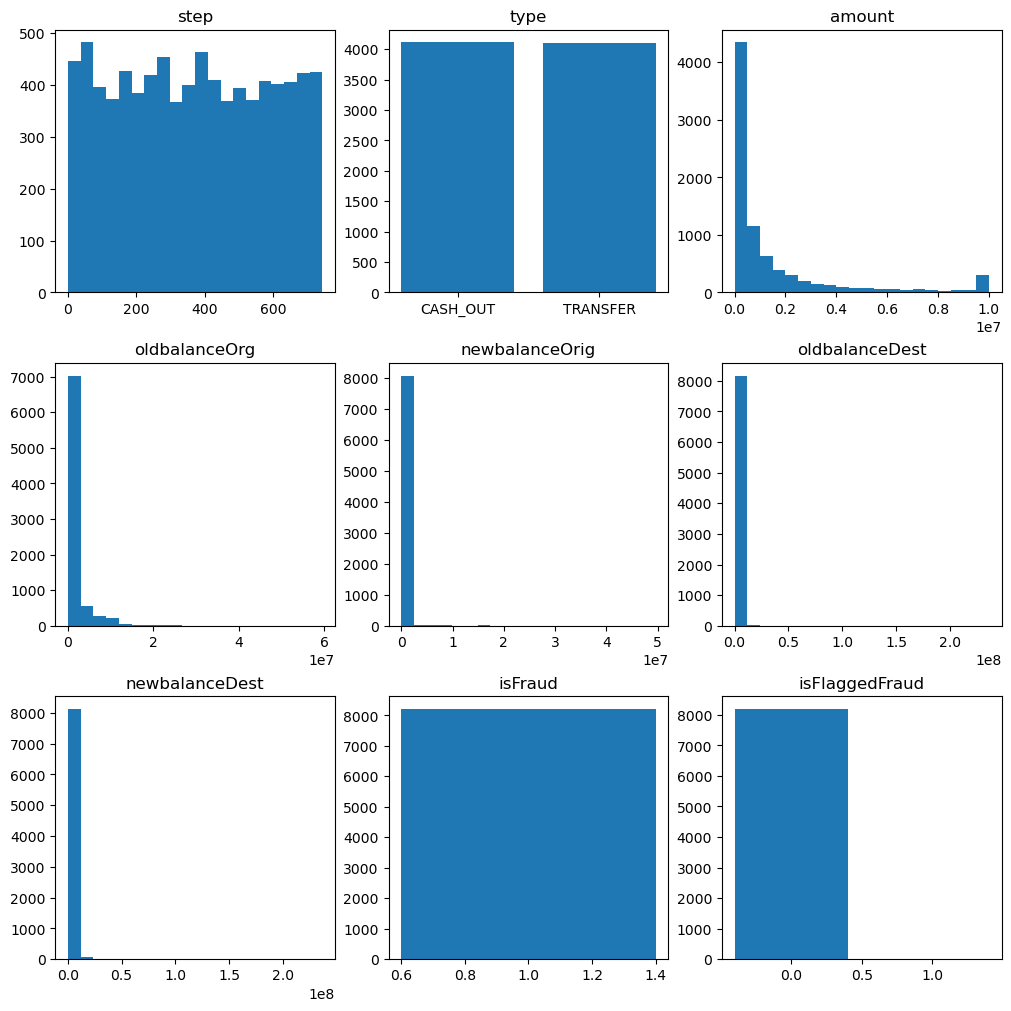

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10), layout='constrained')
fraud_filterd = fraud[fraud['isFraud'] == 1]

for col, ax in zip(cols_to_plot, axes.ravel()):
    if col in numerical_features:
        ax.hist(fraud_filterd[col], bins=20)
        ax.set_title(col)
    else:
        ax.bar(fraud_filterd[col].value_counts().index, fraud_filterd[col].value_counts().values)
        ax.set_title(col)

plt.show()